In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Metbrains/Nigerian_Road_Traffic_Crashes_2020_2024.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [ ]:
df.shape

(518, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In [ ]:
df.columns

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')

In [ ]:
df.describe()

,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,38.444015
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,61.983992
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000


**Inferences**

1. Total Crashes

83.5 crashes per unit has been recorded. Minimum number of crashes were 1 whereas 538 was maximum. A large difference between mean and maximum number of crashes indicate a posiltive skewness.

2. Number of Injuries

245 injuries per unit has been recorded. Minimum number of injuries were 0 whereas 1149 was maximum. A large difference between mean and maximum number of crashes indicate a posiltive skewness.

3. Fatality

40 fatality per unit has been recorded. Minimum number of fatality were 0 whereas 224 was maximum. A large difference between mean and maximum number of fatality indicate a posiltive skewness.

4. Total vechicle involved

100 involvement per unit has been recorded. Minimum number of involvements were 0 whereas 864 was maximum. A large difference between mean and maximum number of involvement indicate a posiltive skewness.

5. Speed Violation

37 incidents per unit has been recorded. Minimum number of involvements were 0 whereas 340 was maximum. A large difference between mean and maximum number of speed violation a posiltive skewness.

6. Poor Weather

0.35 incident per unit has been recorded. Minimum number of involvements were 0 whereas 25 was maximum. A significant difference between mean and maximum number of involvement indicate a posiltive skewness.

In [ ]:
df['Quarter_Num'] = df['Quarter'].str.split(' ').str[0].str.replace('Q', '').astype(int)
df['Year'] = df['Quarter'].str.split(' ').str[1].astype(int)

df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Quarter_Num,Year
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18,4,2020
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37,4,2020
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8,4,2020
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39,4,2020
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66,4,2020


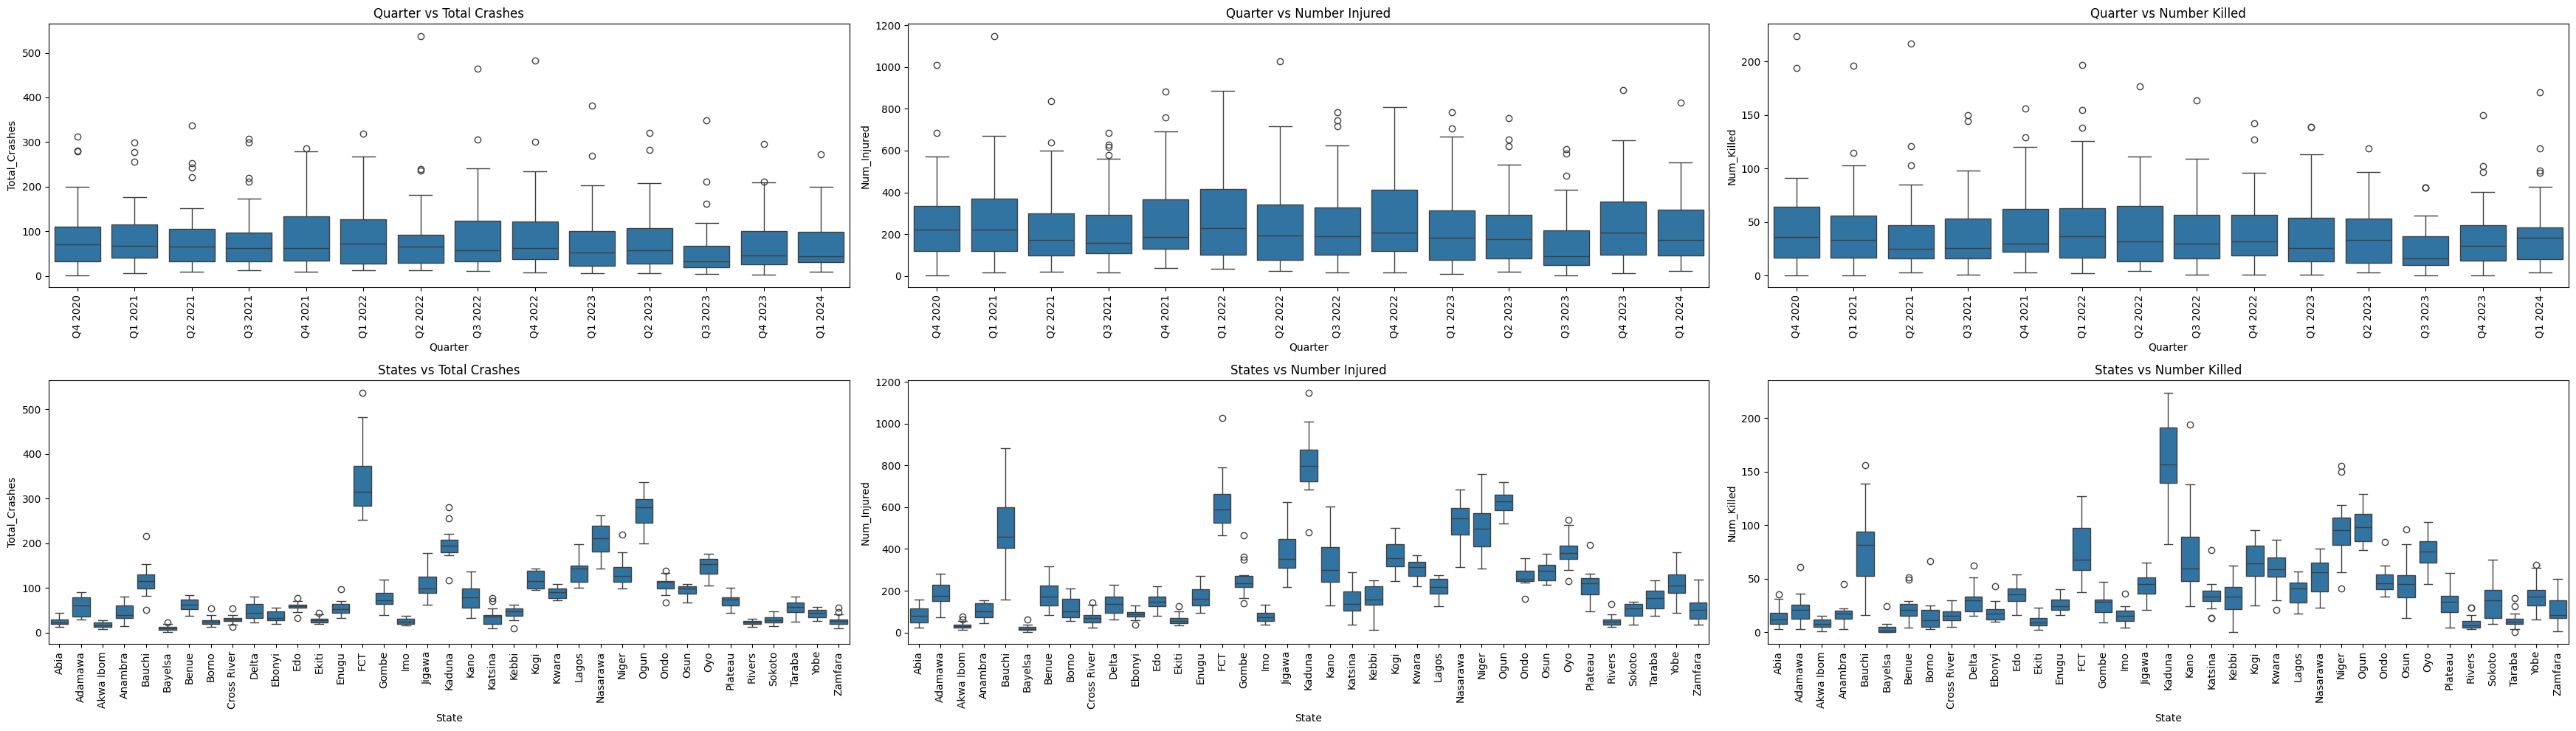

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(35, 10))

# Define the columns to plot
quarter_cols = ['Total_Crashes', 'Num_Injured', 'Num_Killed']
state_cols = ['Total_Crashes', 'Num_Injured', 'Num_Killed']

# Define titles
quarter_titles = ['Quarter vs Total Crashes', 'Quarter vs Number Injured', 'Quarter vs Number Killed']
state_titles = ['States vs Total Crashes', 'States vs Number Injured', 'States vs Number Killed']

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot for Quarter
for i, col in enumerate(quarter_cols):
    sns.boxplot(x='Quarter', y=col, data=df, ax=axes[i])
    axes[i].set_title(quarter_titles[i])
    axes[i].set_xlabel('Quarter')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=90)

# Plot for State
for i, col in enumerate(state_cols):
    top_10_states = df.groupby('State')[col].sum().sort_values(ascending=False).index
    sns.boxplot(x='State', y=col, data=df[df['State'].isin(top_10_states)], ax=axes[i+3])
    axes[i+3].set_title(state_titles[i])
    axes[i+3].set_xlabel('State')
    axes[i+3].set_ylabel(col)
    axes[i+3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

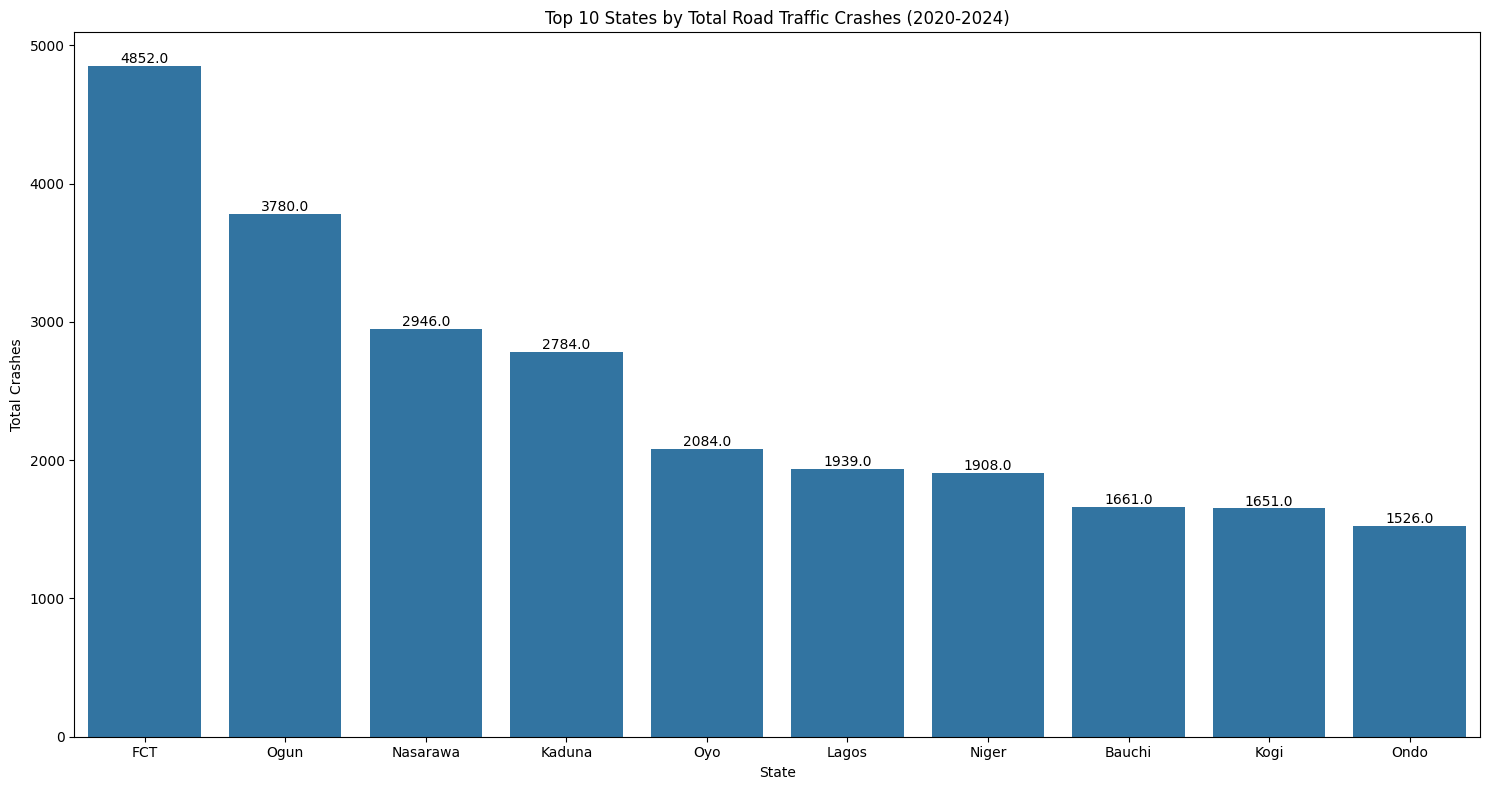

In [ ]:
crashes_by_state = df.groupby('State')['Total_Crashes'].sum().sort_values(ascending=False)

# Select the top 10 states
top_10_crashes_by_state = crashes_by_state.head(10)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_10_crashes_by_state.index, y=top_10_crashes_by_state.values)
plt.xticks(rotation=0)
plt.xlabel('State')
plt.ylabel('Total Crashes')
plt.title('Top 10 States by Total Road Traffic Crashes (2020-2024)')
plt.tight_layout()

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

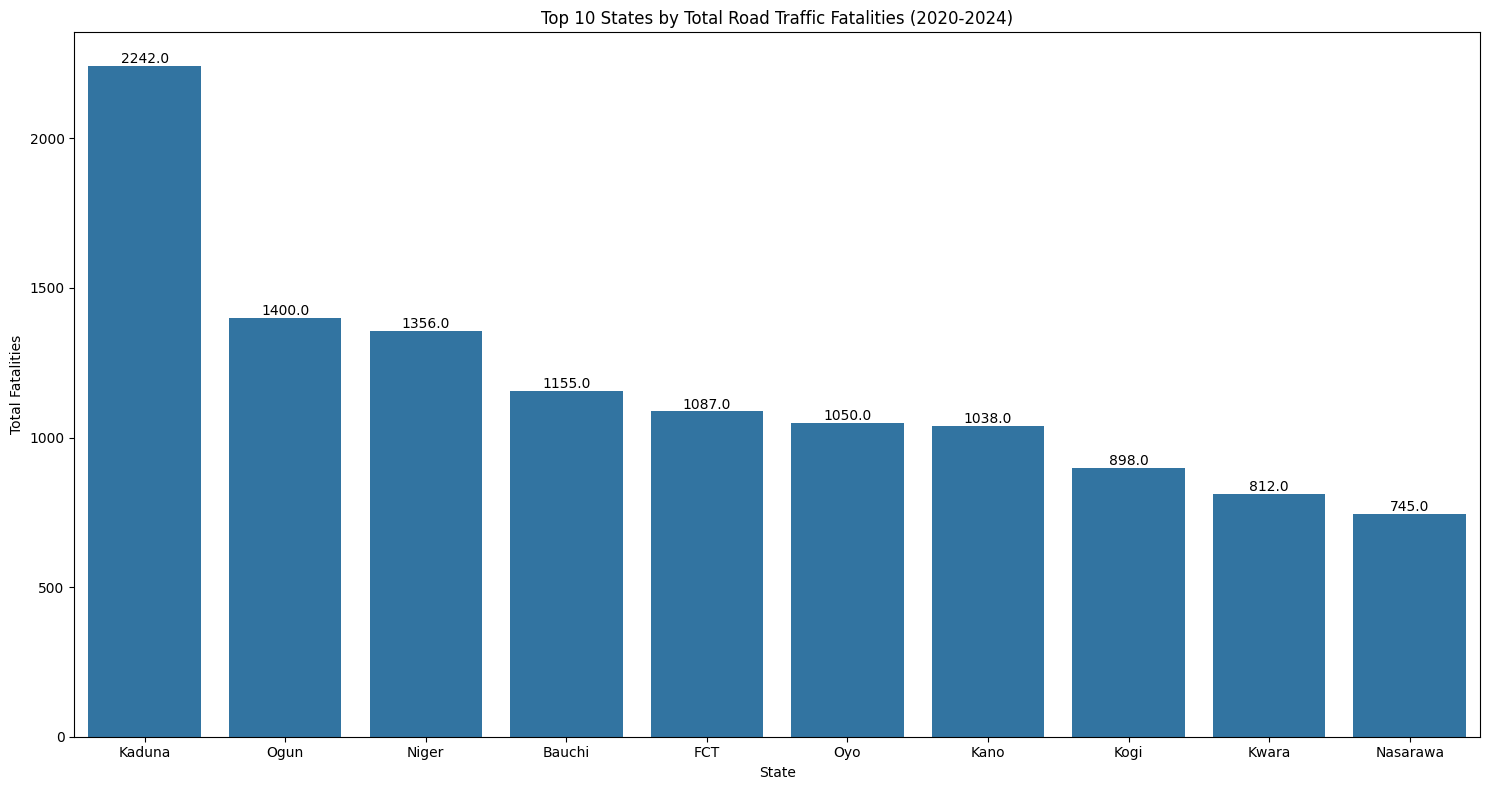

In [ ]:
fatalities_by_state = df.groupby('State')['Num_Killed'].sum().sort_values(ascending=False)

# Select the top 10 states
top_10_fatalities_by_state = fatalities_by_state.head(10)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_10_fatalities_by_state.index, y=top_10_fatalities_by_state.values)
plt.xticks(rotation=0)
plt.xlabel('State')
plt.ylabel('Total Fatalities')
plt.title('Top 10 States by Total Road Traffic Fatalities (2020-2024)')
plt.tight_layout()

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

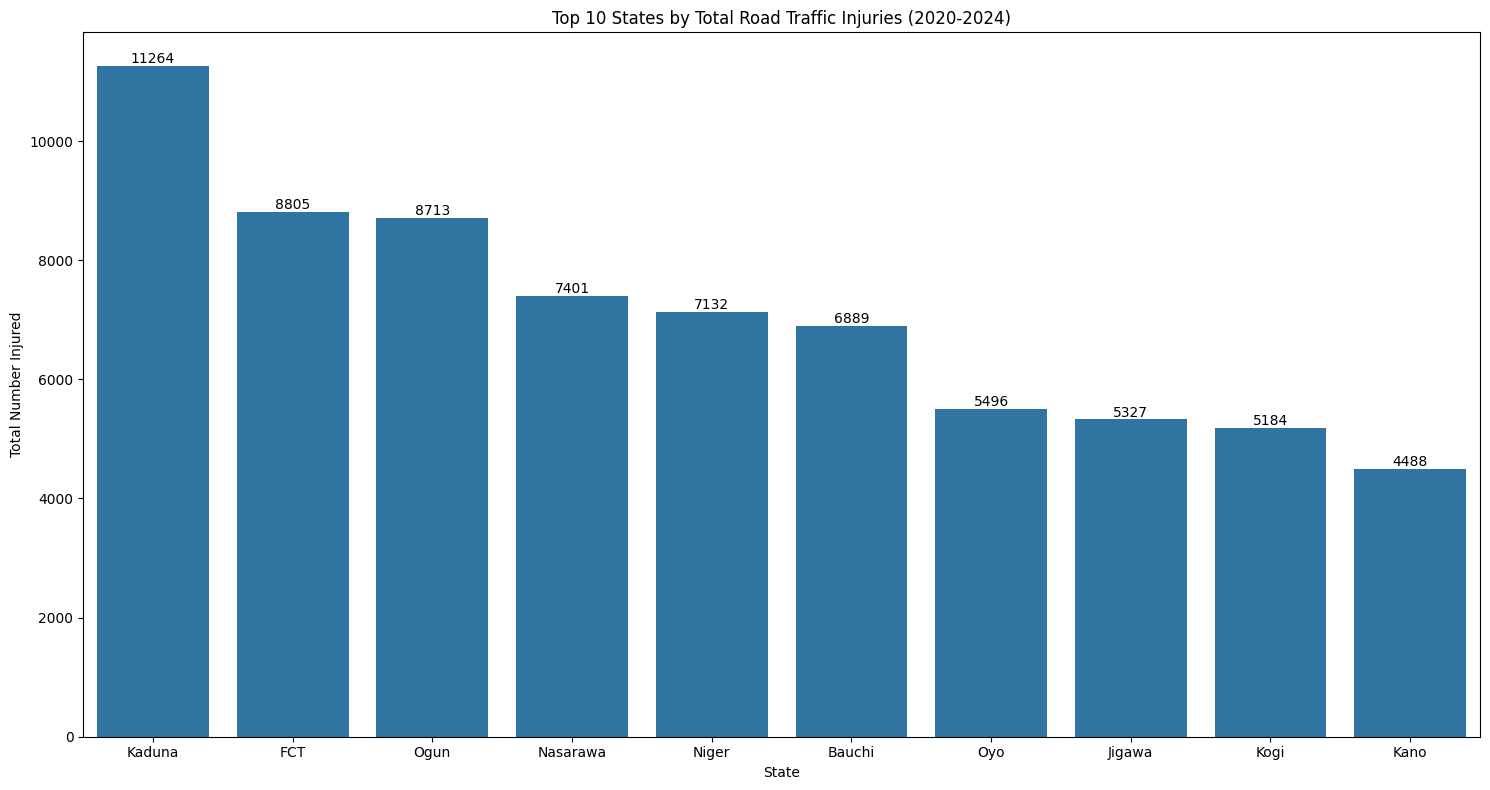

In [ ]:
# Reload the original dataset to get raw counts
file_path = '/content/drive/MyDrive/Metbrains/Nigerian_Road_Traffic_Crashes_2020_2024.csv'
df_raw = pd.read_csv(file_path)

# Aggregate data by state and get the sum of 'Num_Injured' using the raw data
injured_by_state_raw = df_raw.groupby('State')['Num_Injured'].sum().sort_values(ascending=False)

# Select the top 10 states
top_10_injured_by_state_raw = injured_by_state_raw.head(10)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_10_injured_by_state_raw.index, y=top_10_injured_by_state_raw.values)
plt.xticks(rotation=0)
plt.xlabel('State')
plt.ylabel('Total Number Injured')
plt.title('Top 10 States by Total Road Traffic Injuries (2020-2024)')
plt.tight_layout()

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

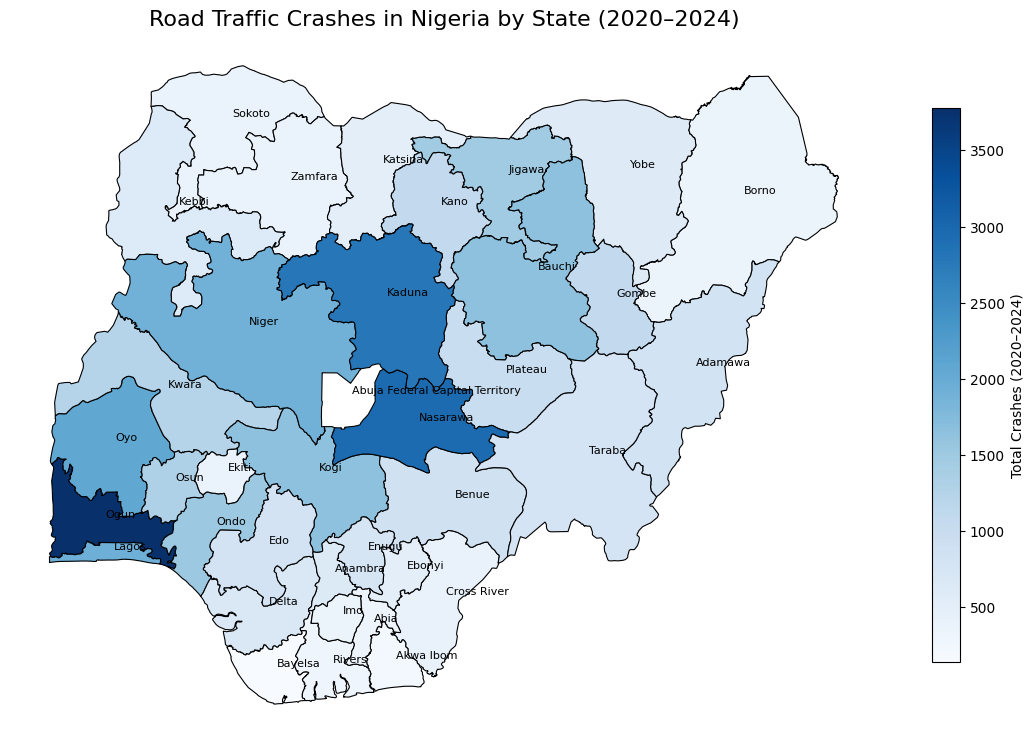

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Nigeria shapefile
nigeria_map = gpd.read_file("/content/drive/MyDrive/Metbrains/geoBoundaries-NGA-ADM1.geojson")

# Ensure consistent naming between dataset and shapefile
nigeria_map['state_clean'] = nigeria_map['shapeName'].str.lower()

# Prepare crash dataset
crashes_by_state = df.groupby('State')['Total_Crashes'].sum().reset_index()
crashes_by_state['state_clean'] = crashes_by_state['State'].str.lower()

# Merge shapefile with crash data
merged = nigeria_map.merge(crashes_by_state, on='state_clean', how='left')

# Re-project to a projected CRS for accurate centroid calculation
merged = merged.to_crs(epsg=32632) # Using WGS 84 / UTM zone 32N, a common CRS for Nigeria

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
merged.plot(column='Total_Crashes',
            cmap='Blues',
            linewidth=0.8,
            ax=ax,
            edgecolor='black',
            legend=True,
            legend_kwds={'label': "Total Crashes (2020–2024)", 'shrink': 0.6})

# Add state names as annotations
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)


plt.title("Road Traffic Crashes in Nigeria by State (2020–2024)", fontsize=16)
plt.axis('off')
plt.show()

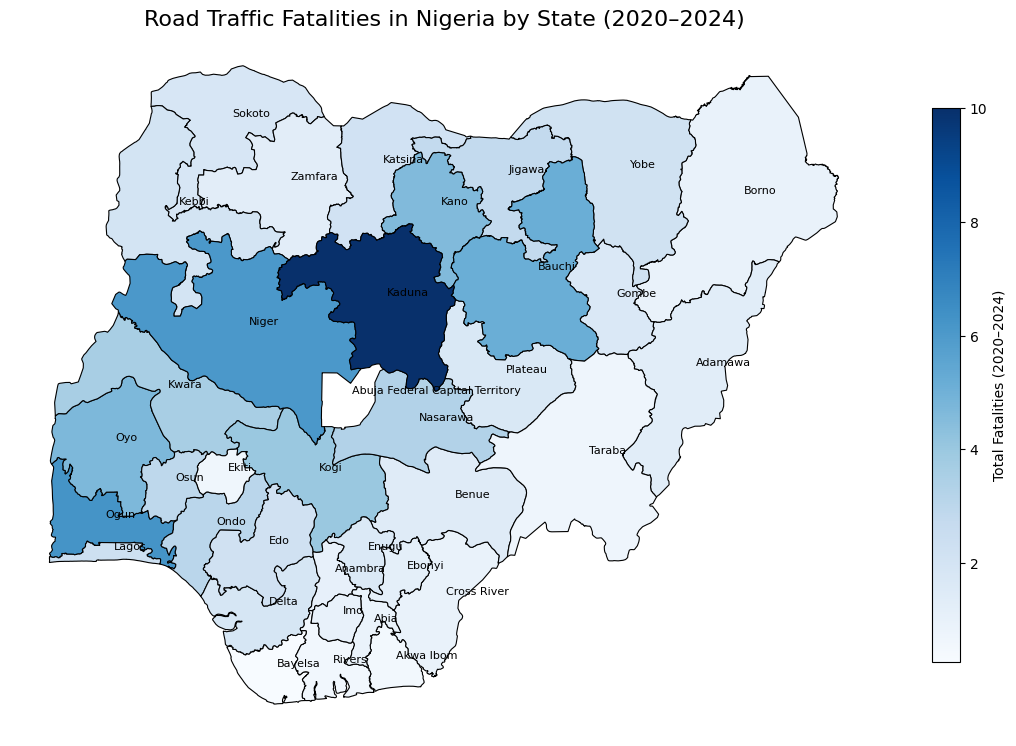

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ensure consistent naming between dataset and shapefile
nigeria_map['state_clean'] = nigeria_map['shapeName'].str.lower()

# Prepare fatalities dataset
fatalities_by_state = df.groupby('State')['Num_Killed'].sum().reset_index()
fatalities_by_state['state_clean'] = fatalities_by_state['State'].str.lower()

# Merge shapefile with fatality data
merged_fatalities = nigeria_map.merge(fatalities_by_state, on='state_clean', how='left')

# Re-project to a projected CRS for accurate centroid calculation
merged_fatalities = merged_fatalities.to_crs(epsg=32632)

# Plot choropleth for fatalities
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
merged_fatalities.plot(column='Num_Killed',
            cmap='Blues',
            linewidth=0.8,
            ax=ax,
            edgecolor='black',
            legend=True,
            legend_kwds={'label': "Total Fatalities (2020–2024)", 'shrink': 0.6})

# Add state names as annotations
for x, y, label in zip(merged_fatalities.geometry.centroid.x, merged_fatalities.geometry.centroid.y, merged_fatalities['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

plt.title("Road Traffic Fatalities in Nigeria by State (2020–2024)", fontsize=16)
plt.axis('off')
plt.show()

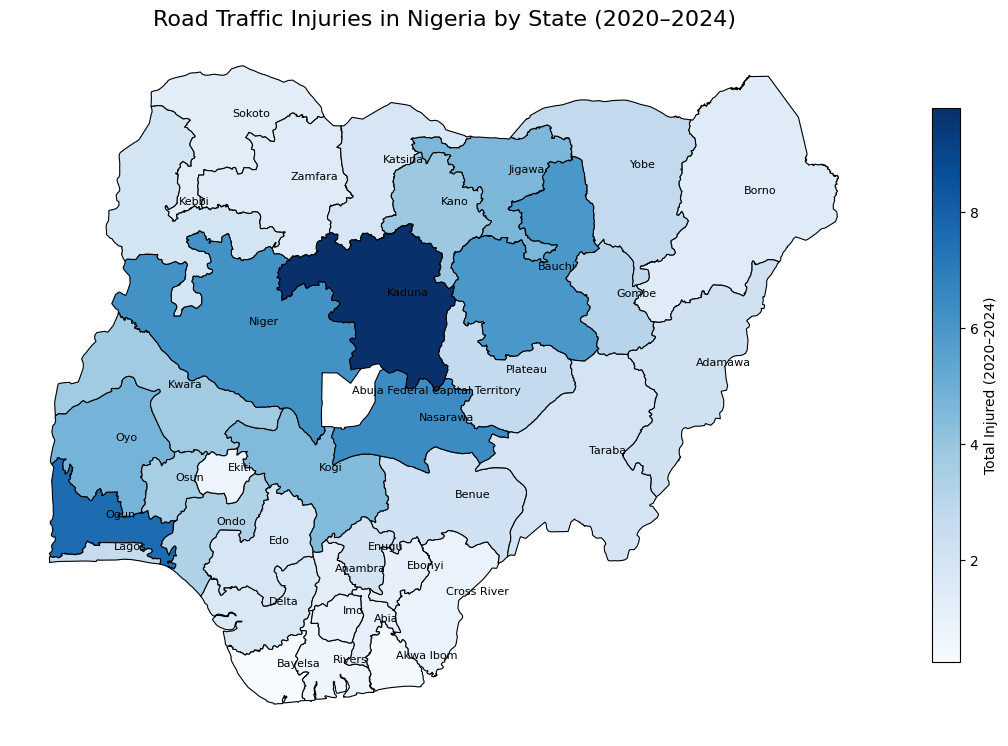

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ensure consistent naming between dataset and shapefile
nigeria_map['state_clean'] = nigeria_map['shapeName'].str.lower()

# Prepare injured dataset
injured_by_state = df.groupby('State')['Num_Injured'].sum().reset_index()
injured_by_state['state_clean'] = injured_by_state['State'].str.lower()

# Merge shapefile with injured data
merged_injured = nigeria_map.merge(injured_by_state, on='state_clean', how='left')

# Re-project to a projected CRS for accurate centroid calculation
merged_injured = merged_injured.to_crs(epsg=32632)

# Plot choropleth for injuries
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
merged_injured.plot(column='Num_Injured',
            cmap='Blues',
            linewidth=0.8,
            ax=ax,
            edgecolor='black',
            legend=True,
            legend_kwds={'label': "Total Injured (2020–2024)", 'shrink': 0.6})

# Add state names as annotations
for x, y, label in zip(merged_injured.geometry.centroid.x, merged_injured.geometry.centroid.y, merged_injured['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

plt.title("Road Traffic Injuries in Nigeria by State (2020–2024)", fontsize=16)
plt.axis('off')
plt.show()

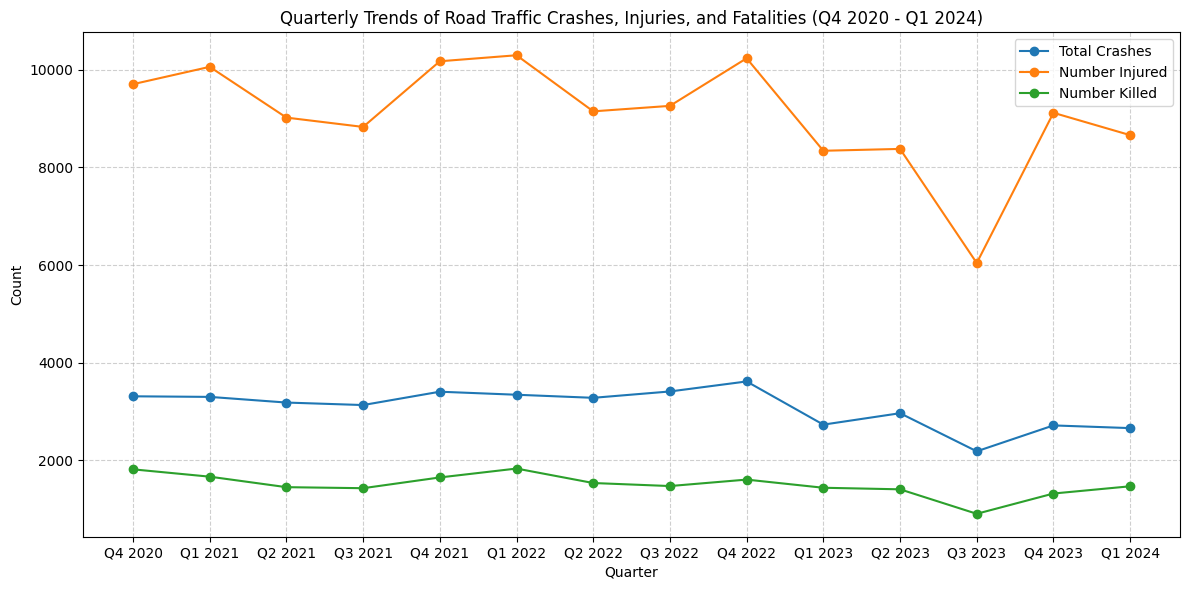

In [ ]:
# Aggregate data by quarter
trend = df.groupby('Quarter')[['Total_Crashes', 'Num_Injured', 'Num_Killed']].sum().reset_index()

# Define the correct order of quarters
quarter_order = ['Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021',
                 'Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022',
                 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023',
                 'Q1 2024']

# Convert 'Quarter' to a categorical type with the specified order
trend['Quarter'] = pd.Categorical(trend['Quarter'], categories=quarter_order, ordered=True)

# Sort by the ordered 'Quarter' column
trend = trend.sort_values(by='Quarter')

# Visualization : Quarterly Trends
plt.figure(figsize=(12, 6))
plt.plot(trend["Quarter"], trend["Total_Crashes"], marker="o", label="Total Crashes")
plt.plot(trend["Quarter"], trend["Num_Injured"], marker="o", label="Number Injured")
plt.plot(trend["Quarter"], trend["Num_Killed"], marker="o", label="Number Killed")
plt.title("Quarterly Trends of Road Traffic Crashes, Injuries, and Fatalities (Q4 2020 - Q1 2024)")
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.xticks(rotation=0, ha="center")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

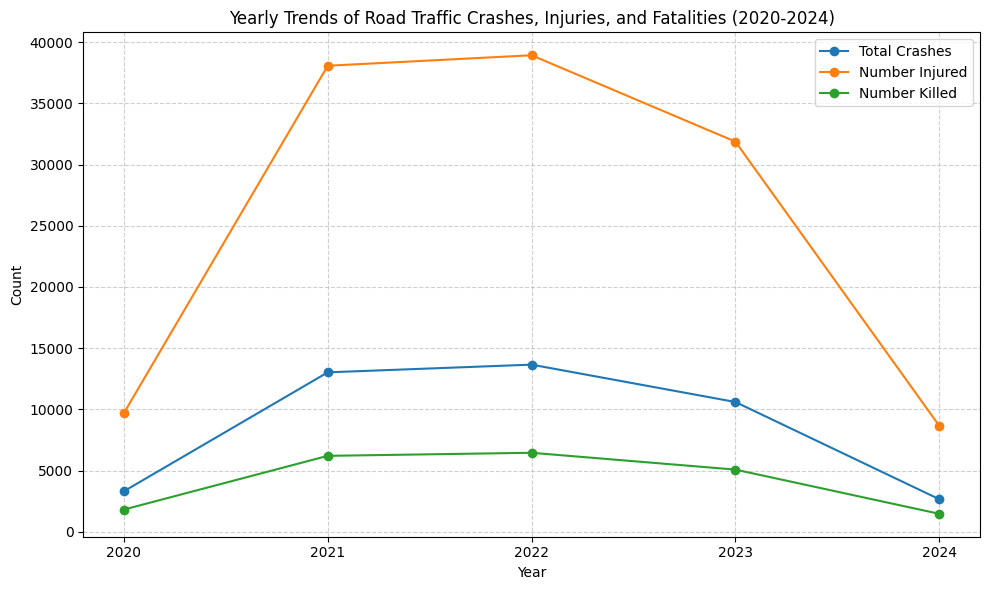

In [ ]:
# Aggregate data by year
yearly_trend = df.groupby('Year')[['Total_Crashes', 'Num_Injured', 'Num_Killed']].sum().reset_index()

# Visualization: Yearly Trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend["Year"], yearly_trend["Total_Crashes"], marker="o", label="Total Crashes")
plt.plot(yearly_trend["Year"], yearly_trend["Num_Injured"], marker="o", label="Number Injured")
plt.plot(yearly_trend["Year"], yearly_trend["Num_Killed"], marker="o", label="Number Killed")
plt.title("Yearly Trends of Road Traffic Crashes, Injuries, and Fatalities (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(yearly_trend["Year"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Replace negative values in 'Other_Factors' with 0
df['Other_Factors'] = df['Other_Factors'].apply(lambda x: max(0, x))

# Verify the changes
display(df[['Other_Factors']].describe())

,Other_Factors
count,518.000000
mean,43.090734
std,52.522975
min,0.000000
25%,12.000000
50%,27.000000
75%,57.000000
max,586.000000


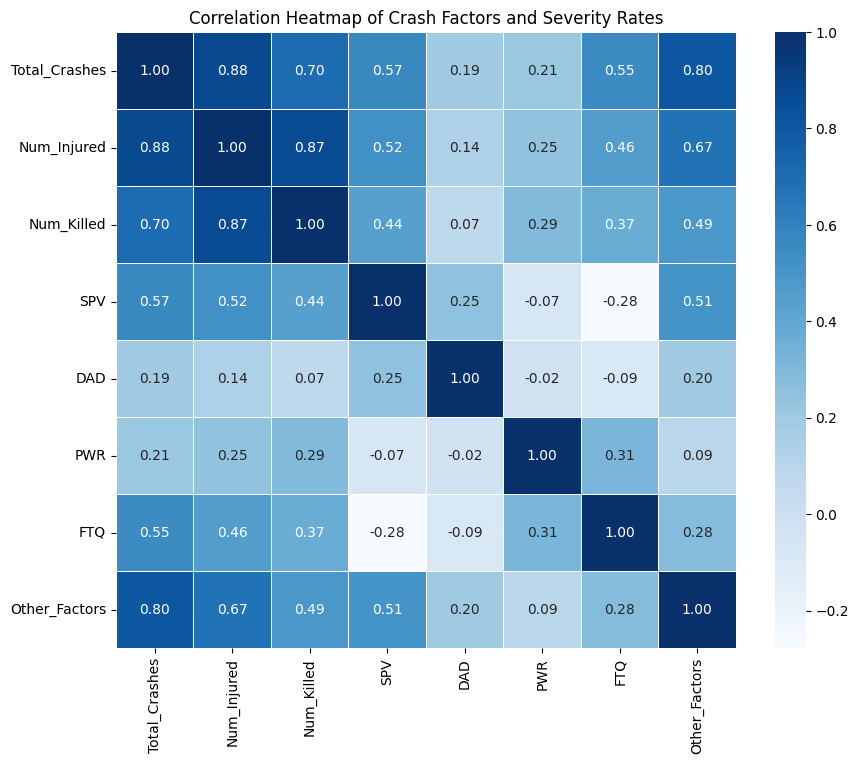

In [ ]:
# Select the relevant columns for correlation analysis
correlation_columns = ['Total_Crashes', 'Num_Injured', 'Num_Killed', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']
correlation_data = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Crash Factors and Severity Rates')
plt.show()

In [ ]:
df['Fatality_Rate'] = df['Num_Killed'] / df['Total_Crashes']
df['Fatality_Rate'] = df['Fatality_Rate'].replace([np.inf, -np.inf], 0)
df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Quarter_Num,Year,Fatality_Rate
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18,4,2020,1.033333
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37,4,2020,0.467532
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8,4,2020,0.318182
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39,4,2020,0.277778
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66,4,2020,0.584416


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Total_Crashes', 'Num_Injured', 'Num_Killed', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Fatality_Rate']

scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Quarter_Num,Year,Fatality_Rate
0,Q4 2020,Abia,0.054004,0.125545,0.138393,37,0.055882,0.00,0.0,0.000000,0.030717,4,2020,0.363063
1,Q4 2020,Adamawa,0.141527,0.202267,0.160714,94,0.167647,0.00,0.0,0.000000,0.063140,4,2020,0.164268
2,Q4 2020,Akwa Ibom,0.039106,0.022668,0.031250,24,0.044118,0.00,0.0,0.002353,0.013652,4,2020,0.111794
3,Q4 2020,Anambra,0.132216,0.130776,0.089286,83,0.126471,0.25,0.0,0.000000,0.066553,4,2020,0.097598
4,Q4 2020,Bauchi,0.284916,0.595466,0.401786,140,0.217647,0.00,0.0,0.000000,0.112628,4,2020,0.205335


In [ ]:
quarterly_trends_normalized = df.groupby('Quarter')[['Total_Crashes', 'Num_Injured', 'Num_Killed', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Fatality_Rate']].mean().reset_index()

In [ ]:
quarterly_trends_melted = quarterly_trends_normalized.melt(
    id_vars='Quarter',
    var_name='Metric',
    value_name='Normalized Value'
)
display(quarterly_trends_melted.head())

,Quarter,Metric,Normalized Value
0,Q1 2021,Total_Crashes,0.164276
1,Q1 2022,Total_Crashes,0.166491
2,Q1 2023,Total_Crashes,0.135689
3,Q1 2024,Total_Crashes,0.132115
4,Q2 2021,Total_Crashes,0.158438


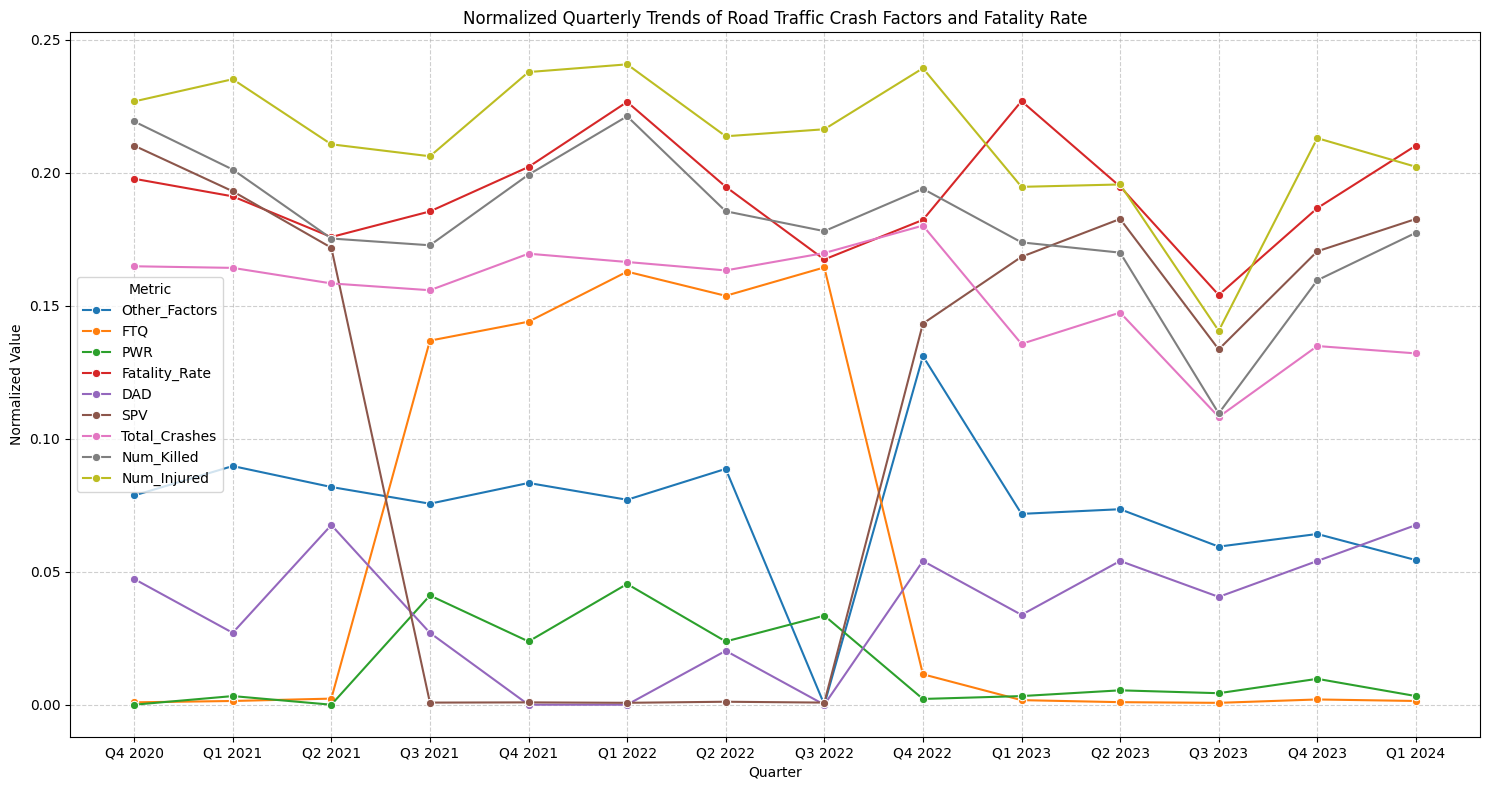

In [ ]:
# Define the correct order of quarters. Without correct order, graph will create confusion.
quarter_order = ['Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021',
                 'Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022',
                 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023',
                 'Q1 2024']

# Convert 'Quarter' to a categorical type with the specified order
quarterly_trends_melted['Quarter'] = pd.Categorical(quarterly_trends_melted['Quarter'], categories=quarter_order, ordered=True)

# Sort by the ordered 'Quarter' column
quarterly_trends_melted = quarterly_trends_melted.sort_values(by='Quarter')

# Create a line plot for all factors
plt.figure(figsize=(15, 8))
sns.lineplot(data=quarterly_trends_melted, x='Quarter', y='Normalized Value', hue='Metric', marker='o')
plt.title('Normalized Quarterly Trends of Road Traffic Crash Factors and Fatality Rate')
plt.xlabel('Quarter')
plt.ylabel('Normalized Value')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

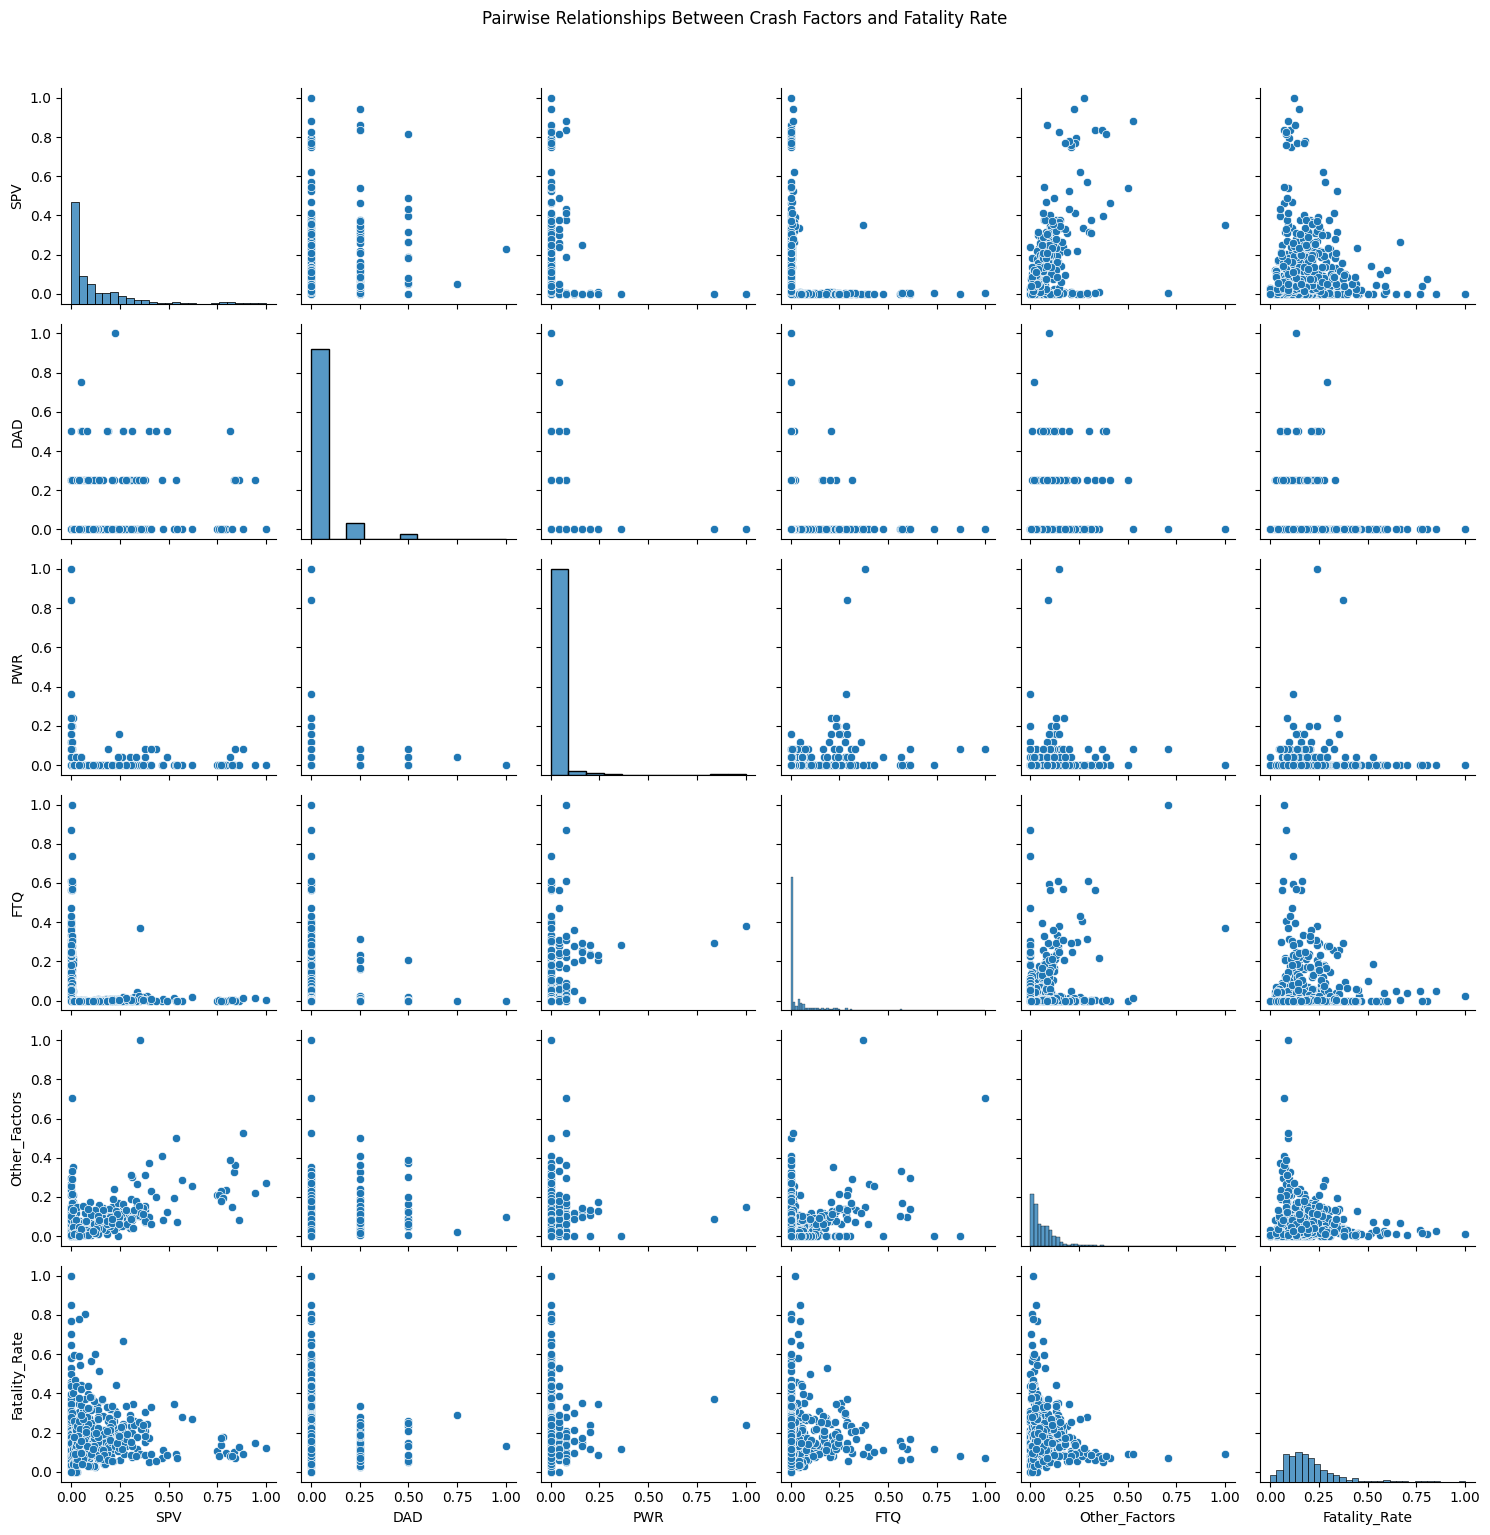

In [ ]:
crash_factors = ['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']
fatality_rate = 'Fatality_Rate'

# Combine the crash factors and fatality rate into a single list for pairplot
plot_columns = crash_factors + [fatality_rate]

plt.figure(figsize=(15, 10))
sns.pairplot(data=df[plot_columns])
plt.suptitle('Pairwise Relationships Between Crash Factors and Fatality Rate', y=1.02)
plt.tight_layout()
plt.show()

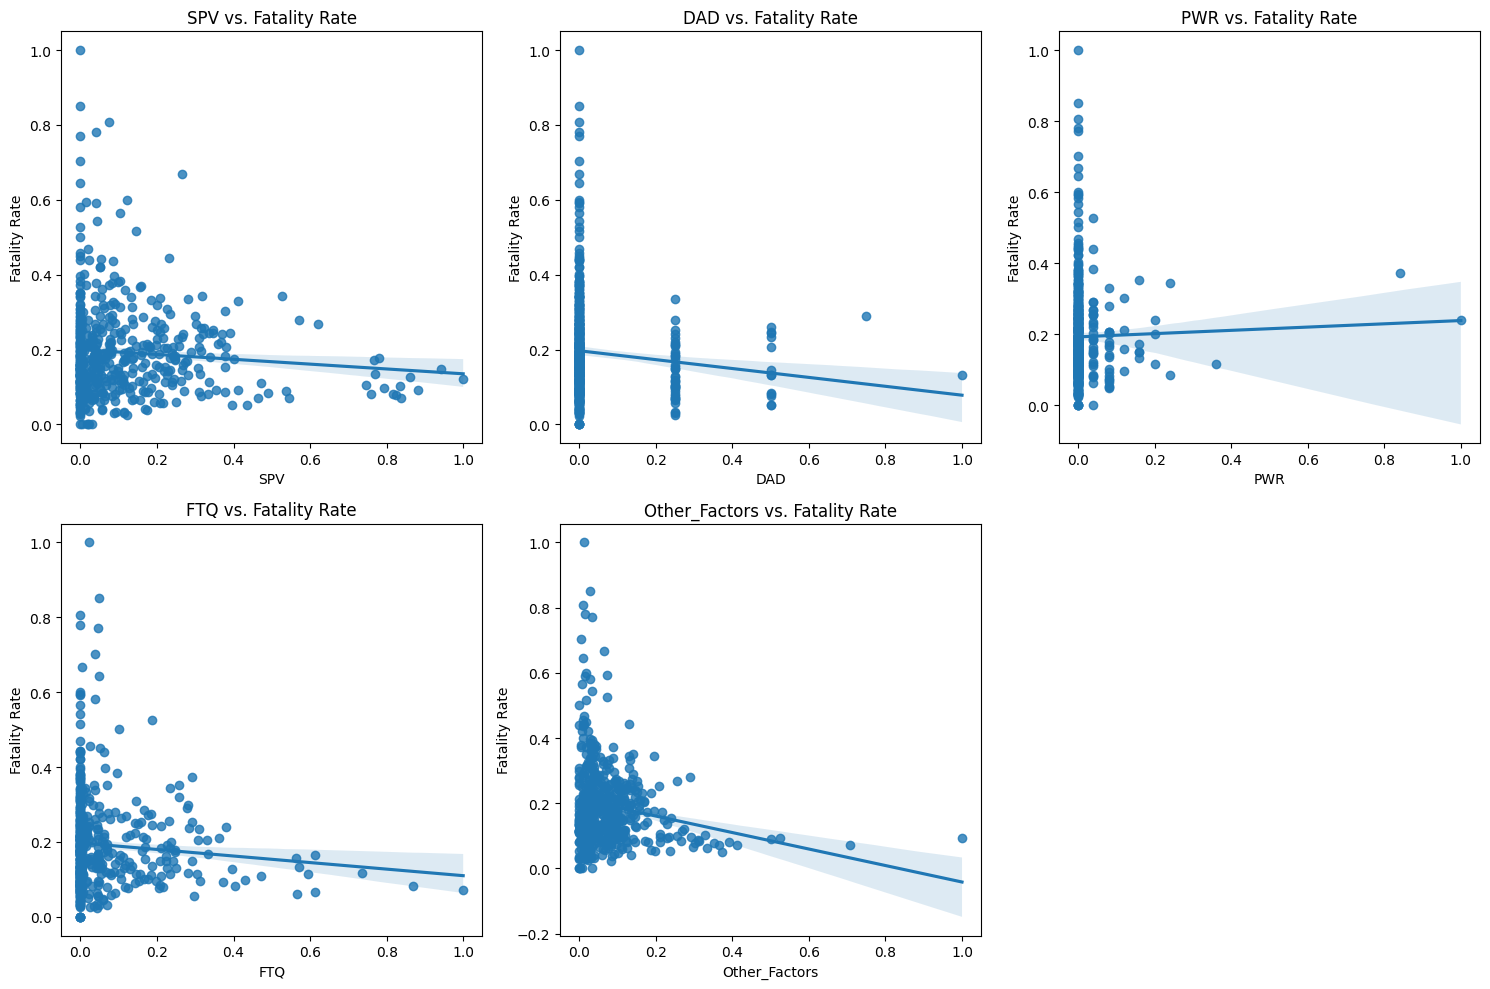

In [ ]:
crash_factors = ['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']
fatality_rate = 'Fatality_Rate'

plt.figure(figsize=(15, 10))

for i, factor in enumerate(crash_factors):
    plt.subplot(2, 3, i + 1)
    sns.regplot(data=df, x=factor, y=fatality_rate)
    plt.title(f'{factor} vs. Fatality Rate')
    plt.xlabel(factor)
    plt.ylabel('Fatality Rate')

plt.tight_layout()
plt.show()